In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing import text
from tensorflow.keras.preprocessing import sequence
import tensorflow.keras as keras
import tensorflow_model_analysis as tfma
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import nltk


C:\Users\ly\AppData\Roaming\Python\Python37\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ly\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.gk7gx5keq4f6uyo3p26ulgbqyhgqo7j4.gfortran-win_amd64.dll
C:\Users\ly\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


### NLTK pre-trained sentiment analyzer
https://realpython.com/python-nltk-sentiment-analysis/

In [2]:
nltk.download([
    "names",
    "stopwords",
    "state_union",
    "averaged_perceptron_tagger",
    "vader_lexicon",
    "punkt",
    ])



[nltk_data] Downloading package names to
[nltk_data]     C:\Users\ly\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ly\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\ly\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ly\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ly\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ly\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
posters_replies = pd.read_csv('processed/posters_replies_0.csv')
replies_replies = pd.read_csv('processed/replies_replies_0.csv')
posters_replies_df = posters_replies[['text_x', 'theta_x', 'text_y', 'theta_y']]
posters_replies_df.shape

C:\Users\ly\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3173: DtypeWarning: Columns (22,23,24,26,44,59,90,91,93,101,103,104,105,111,126) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(26352, 4)

In [4]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

sentiment_x = sia.polarity_scores(posters_replies_df['text_x'].iloc[0])
sentiment_x

{'neg': 0.216, 'neu': 0.673, 'pos': 0.112, 'compound': -0.7777}

In [5]:
def analyze_sentiment(text):
    return sia.polarity_scores(text)

posters_replies_df[['neg_x', 'neu_x', 'pos_x', 'compound_x']] = posters_replies_df['text_x'].apply(lambda x: pd.Series(analyze_sentiment(x)))
posters_replies_df[['neg_y', 'neu_y', 'pos_y', 'compound_y']] = posters_replies_df['text_y'].apply(lambda y: pd.Series(analyze_sentiment(y)))


C:\Users\ly\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [20]:
# posters_replies_df.to_csv('processed/sentiment.csv', index=False)
# posters_replies_df.head()

,text_x,theta_x,text_y,theta_y,neg_x,neu_x,pos_x,compound_x,neg_y,neu_y,pos_y,compound_y
0,Sleepy Joe Biden was in charge of the H1N1 Swi...,2.755571,@Guffie12T @ruda19_dorota @kingnutfuzz @mmpade...,2.892213,0.216,0.673,0.112,-0.7777,0.133,0.867,0.000,-0.3818
1,Sleepy Joe Biden was in charge of the H1N1 Swi...,2.755571,@eugenegu @realDonaldTrump Quit Grand Standing...,1.218348,0.216,0.673,0.112,-0.7777,0.220,0.678,0.102,-0.8098
2,Sleepy Joe Biden was in charge of the H1N1 Swi...,2.755571,@realDonaldTrump LOL you're a buffoon and out ...,-0.396186,0.216,0.673,0.112,-0.7777,0.000,0.757,0.243,0.5473
3,Sleepy Joe Biden was in charge of the H1N1 Swi...,2.755571,@realDonaldTrump Americans will ban together t...,0.004751,0.216,0.673,0.112,-0.7777,0.146,0.805,0.049,-0.4310
4,Sleepy Joe Biden was in charge of the H1N1 Swi...,2.755571,@realDonaldTrump Nut job!,-1.109960,0.216,0.673,0.112,-0.7777,0.000,1.000,0.000,0.0000


In [7]:
# read the data from the csv file directly
posters_replies_df = pd.read_csv("processed/sentiment.csv")
posters_replies_df.head()

,text_x,theta_x,text_y,theta_y,neg_x,neu_x,pos_x,compound_x,neg_y,neu_y,pos_y,compound_y
0,Sleepy Joe Biden was in charge of the H1N1 Swi...,2.755571,@Guffie12T @ruda19_dorota @kingnutfuzz @mmpade...,2.892213,0.216,0.673,0.112,-0.7777,0.133,0.867,0.000,-0.3818
1,Sleepy Joe Biden was in charge of the H1N1 Swi...,2.755571,@eugenegu @realDonaldTrump Quit Grand Standing...,1.218348,0.216,0.673,0.112,-0.7777,0.220,0.678,0.102,-0.8098
2,Sleepy Joe Biden was in charge of the H1N1 Swi...,2.755571,@realDonaldTrump LOL you're a buffoon and out ...,-0.396186,0.216,0.673,0.112,-0.7777,0.000,0.757,0.243,0.5473
3,Sleepy Joe Biden was in charge of the H1N1 Swi...,2.755571,@realDonaldTrump Americans will ban together t...,0.004751,0.216,0.673,0.112,-0.7777,0.146,0.805,0.049,-0.4310
4,Sleepy Joe Biden was in charge of the H1N1 Swi...,2.755571,@realDonaldTrump Nut job!,-1.109960,0.216,0.673,0.112,-0.7777,0.000,1.000,0.000,0.0000


In [8]:
in_group_mask = (posters_replies_df['theta_x'] * posters_replies_df['theta_y']) > 0
out_group_mask = (posters_replies_df['theta_x'] * posters_replies_df['theta_y']) < 0

# Split the DataFrame
in_group_df = posters_replies_df[in_group_mask ]
out_group_df = posters_replies_df[out_group_mask]

#### Analysis
compound: https://stackoverflow.com/questions/40325980/how-is-the-vader-compound-polarity-score-calculated-in-python-nltk
- positive sentiment: compound score >= 0.05
- neutral sentiment: compound score > -0.05 and compound score < 0.05
- negative sentiment: compound score <= -0.05

C:\Users\ly\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ly\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  after removing the cwd from sys.path.


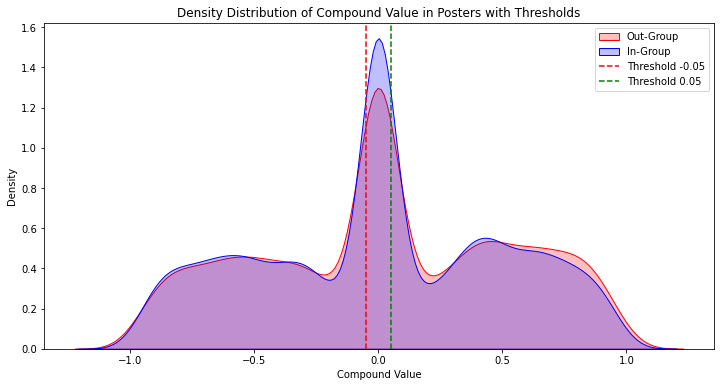

In [19]:
# Create the KDE plot
plt.figure(figsize=(12, 6))
sns.kdeplot(out_group_df['compound_x'], shade=True, color="red", label='Out-Group')
sns.kdeplot(in_group_df['compound_x'], shade=True, color="blue", label='In-Group')

# Add vertical lines for thresholds
plt.axvline(x=-0.05, color='red', linestyle='--', label='Threshold -0.05')
plt.axvline(x=0.05, color='green', linestyle='--', label='Threshold 0.05')

# Adding titles and labels
plt.title('Density Distribution of Compound Value in Posters with Thresholds')
plt.xlabel('Compound Value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

C:\Users\ly\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\ly\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  after removing the cwd from sys.path.


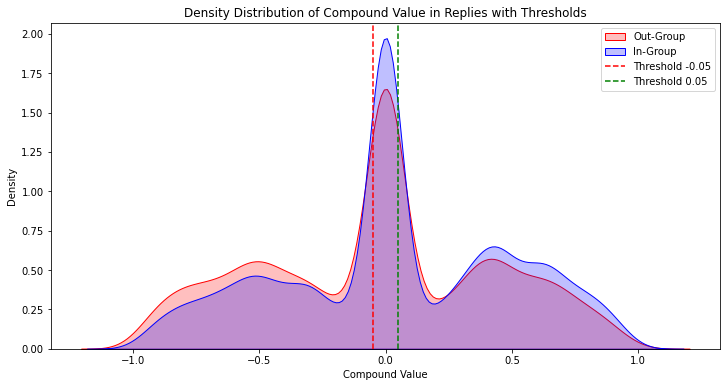

In [20]:

# Create the KDE plot
plt.figure(figsize=(12, 6))
sns.kdeplot(out_group_df['compound_y'], shade=True, color="red", label='Out-Group')
sns.kdeplot(in_group_df['compound_y'], shade=True, color="blue", label='In-Group')

# Add vertical lines for thresholds
plt.axvline(x=-0.05, color='red', linestyle='--', label='Threshold -0.05')
plt.axvline(x=0.05, color='green', linestyle='--', label='Threshold 0.05')

# Adding titles and labels
plt.title('Density Distribution of Compound Value in Replies with Thresholds')
plt.xlabel('Compound Value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

C:\Users\ly\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ly\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  after removing the cwd from sys.path.


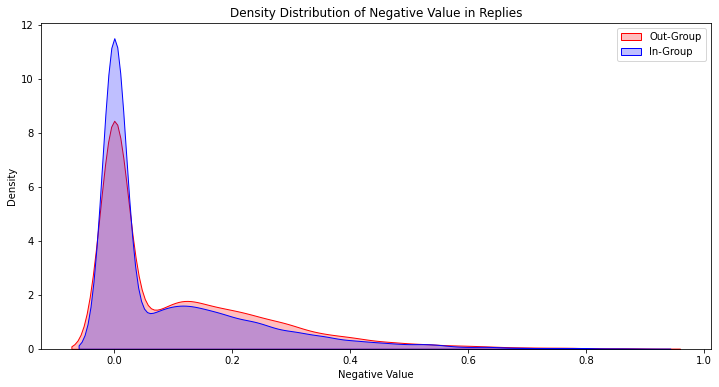

In [18]:
# Create the KDE plot
plt.figure(figsize=(12, 6))
sns.kdeplot(out_group_df['neg_y'], shade=True, color="red", label='Out-Group')
sns.kdeplot(in_group_df['neg_y'], shade=True, color="blue", label='In-Group')

# Add vertical lines for thresholds
# plt.axvline(x=-0.05, color='red', linestyle='--', label='Threshold -0.05')
# plt.axvline(x=0.05, color='green', linestyle='--', label='Threshold 0.05')

# Adding titles and labels
plt.title('Density Distribution of Negative Value in Replies')
plt.xlabel('Negative Value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

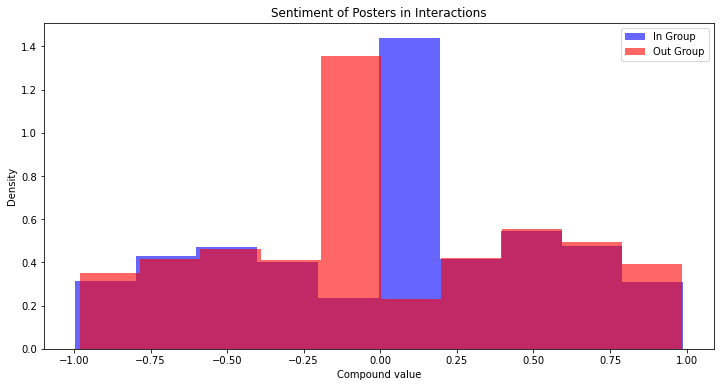

In [22]:
plt.figure(figsize=(12, 6))
plt.hist(in_group_df['compound_x'], bins=10, alpha=0.6, label='In Group', color='blue', density=True)
plt.hist(out_group_df['compound_x'], bins=10, alpha=0.6, label='Out Group', color='red', density=True)
plt.title('Sentiment of Posters in Interactions')
plt.xlabel('Compound value')
# plt.ylabel('Frequency')
plt.ylabel('Density')
plt.legend()
plt.show()

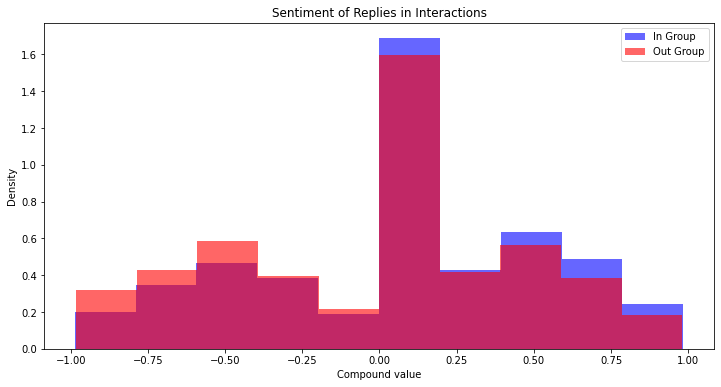

In [23]:
plt.figure(figsize=(12, 6))
plt.hist(in_group_df['compound_y'], bins=10, alpha=0.6, label='In Group', color='blue', density=True)
plt.hist(out_group_df['compound_y'], bins=10, alpha=0.6, label='Out Group', color='red', density=True)
plt.title('Sentiment of Replies in Interactions')
plt.xlabel('Compound value')
# plt.ylabel('Frequency')
plt.ylabel('Density')
plt.legend()
plt.show()

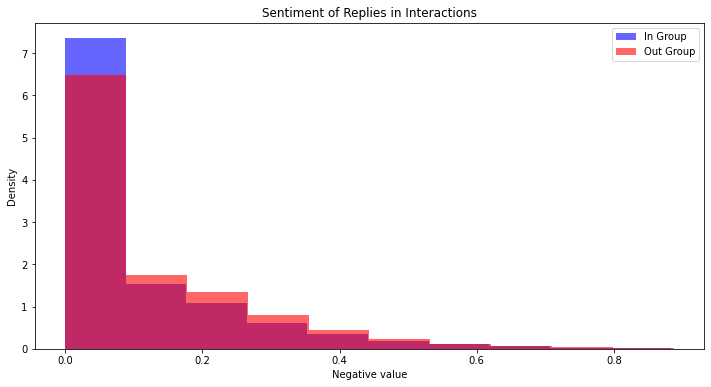

In [9]:
plt.figure(figsize=(12, 6))
plt.hist(in_group_df['neg_y'], bins=10, alpha=0.6, label='In Group', color='blue', density=True)
plt.hist(out_group_df['neg_y'], bins=10, alpha=0.6, label='Out Group', color='red', density=True)
plt.title('Sentiment of Replies in Interactions')
plt.xlabel('Negative value')
# plt.ylabel('Frequency')
plt.ylabel('Density')
plt.legend()
plt.show()

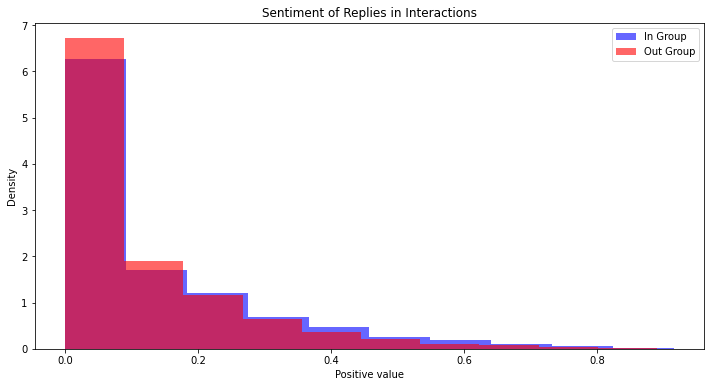

In [10]:
plt.figure(figsize=(12, 6))
plt.hist(in_group_df['pos_y'], bins=10, alpha=0.6, label='In Group', color='blue', density=True)
plt.hist(out_group_df['pos_y'], bins=10, alpha=0.6, label='Out Group', color='red', density=True)
plt.title('Sentiment of Replies in Interactions')
plt.xlabel('Positive value')
# plt.ylabel('Frequency')
plt.ylabel('Density')
plt.legend()
plt.show()